In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
# Генерируем уникальный seed
my_code = "Soloviev"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

np.random.seed(my_seed)

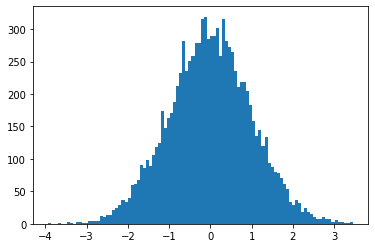

In [17]:
# Формируем случайную нормально распределенную выборку sample
N = 10000
sample = np.random.normal(0, 1, N)

plt.hist(sample, bins=100)
plt.show()

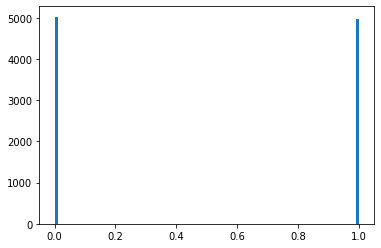

In [18]:
# Формируем массив целевых метока классов: 0 - если значение в sample меньше t и 1 - если больше
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])
plt.hist(target_labels, bins=100)
plt.show()

In [19]:
# Используя данные заготовки (или, при желании, не используя), 
# реализуйте функции для рассчета accuracy, precision, recall и F1

def confusion_matrix(target_labels, model_labels) :
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(target_labels)) :
        if target_labels[i] == 1 and model_labels[i] == 1 :
            tp += 1
        if target_labels[i] == 0 and model_labels[i] == 0 :
            tn += 1
        if target_labels[i] == 0 and model_labels[i] == 1 :
            fp += 1
        if target_labels[i] == 1 and model_labels[i] == 0 :
            fn += 1
    return tp, tn, fp, fn

def metrics_list(target_labels, model_labels):
    metrics_result = []
    metrics_result.append(sk.metrics.accuracy_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.precision_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.recall_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.f1_score(target_labels, model_labels))
    return metrics_result

In [20]:
# Первый эксперимент: t = 0, модель с вероятностью 50% возвращает 0 и 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.5015, 0.4986737400530504, 0.4915526950925181, 0.4950876126810493]

In [21]:
# Второй эксперимент: t = 0, модель с вероятностью 25% возвращает 0 и с 75% - 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

labels = np.random.randint(4, size=N)
model_labels = np.array([0 if i == 0 else 1 for i in labels])
np.random.shuffle(model_labels)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.5012, 0.4989250201558721, 0.746781979082864, 0.5981955856291283]

In [22]:
# Проанализируйте, какие из метрик применимы в первом и втором экспериментах.

In [25]:
# Третий эксперимент: t = 2, модель с вероятностью 50% возвращает 0 и 1
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.5079, 0.02221316486651722, 0.4698275862068966, 0.04242070441720179]

In [26]:
# Четвёртый эксперимент: t = 2, модель с вероятностью 100% возвращает 0
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.zeros(N)

 # Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.9768, 0.0, 0.0, 0.0]

In [ ]:
# Проанализируйте, какие из метрик применимы в третьем и четвёртом экспериментах.